In [89]:
import tensorflow as tf
import os 
print(tf.config.list_physical_devices('GPU'))


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [7]:
training_dir=os.path.join("./brain_tumor_dataset/","training")
validation_dir=os.path.join("./brain_tumor_dataset/","validations")


In [8]:
training_list_type_yes=os.listdir(os.path.join(training_dir,"yes"))
training_list_type_no=os.listdir(os.path.join(training_dir,"no"))

validation_list_type_yes=os.listdir(os.path.join(validation_dir,"yes"))
validation_list_type_no=os.listdir(os.path.join(validation_dir,"no"))

print(f"SIZE TRAINING YES {len(training_list_type_yes)}")
print(f"SIZE TRAINING NO {len(training_list_type_no)}")

print(f"SIZE VALIDATION YES {len(validation_list_type_yes)}")
print(f"SIZE TRAINING NO {len(validation_list_type_no)}")




SIZE TRAINING YES 121
SIZE TRAINING NO 79
SIZE VALIDATION YES 34
SIZE TRAINING NO 19


In [9]:
%matplotlib inline

In [132]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)


<Figure size 4000x4000 with 0 Axes>

### Images with brain tumors

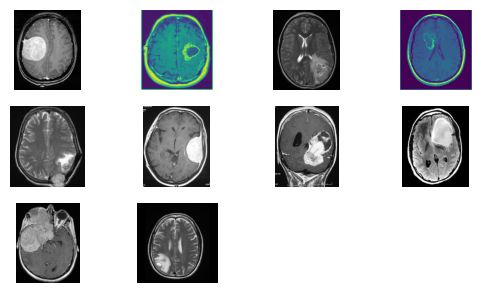

In [133]:
for i in range(0,10):
    complete_path=os.path.join(os.path.join(training_dir,"yes"),training_list_type_yes[i])
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)
    img = mpimg.imread(complete_path) #Convert image as an array suppose numpy 
    plt.imshow(img)
    
plt.show()

### Images without brain tumors

(630, 630)
(201, 173, 3)
(168, 300, 3)
(183, 275, 3)
(168, 300, 3)
(197, 177, 3)
(217, 232, 3)
(231, 218, 3)
(221, 228, 3)
(200, 200, 3)


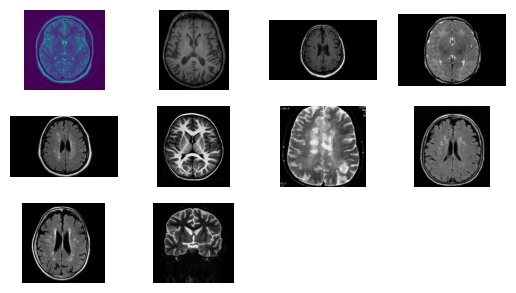

In [16]:
for i in range(0,10):
    complete_path=os.path.join(os.path.join(training_dir,"no"),training_list_type_no[i])
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)
    img = mpimg.imread(complete_path) #Convert image as an array suppose numpy 
    print(img.shape)
    plt.imshow(img)
    
plt.show()

### Define our model

In [107]:
layer=tf.keras.layers

model_brain_v1=tf.keras.models.Sequential([
    layer.Conv2D(32,(4,4),activation='relu',input_shape=(100,100,1)),
    layer.MaxPooling2D(3,3),
    layer.Conv2D(64,(2,2),activation='relu'),
    layer.MaxPooling2D(2,2),
    layer.Flatten(),
    layer.Dense(256,activation="relu"),
    layer.Dense(56,activation="relu"),
    layer.Dense(1,activation="sigmoid")
    
])

model_brain_v1.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 97, 97, 32)        544       
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 31, 31, 64)        8256      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 15, 15, 64)       0         
 g2D)                                                            
                                                                 
 flatten_14 (Flatten)        (None, 14400)             0         
                                                                 
 dense_31 (Dense)            (None, 256)             

In [108]:
from tensorflow.keras.optimizers import RMSprop,Adam

model_brain_v1.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.003),
              metrics=['accuracy'])



### Get dataset

In [109]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_gen=ImageDataGenerator(rescale=1/255)
validation_data_gen=ImageDataGenerator(rescale=1/255)

train_generator=train_data_gen.flow_from_directory(
    training_dir,  # This is the source directory for training images
        target_size=(100, 100),  # All images will be resized to 300x300
        # Since you use binary_crossentropy loss, you need binary labels
        class_mode='binary'
        ,color_mode="grayscale")


validation_generator=validation_data_gen.flow_from_directory(
        validation_dir,  # This is the source directory for training images
        target_size=(100, 100),  # All images will be resized to 300x300
        # Since you use binary_crossentropy loss, you need binary labels
        class_mode='binary',
        color_mode="grayscale")



Found 200 images belonging to 2 classes.
Found 53 images belonging to 2 classes.


In [110]:
print(train_generator.classes)
train_generator

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


### Train Model

In [111]:
size_training=(len(training_list_type_yes)+len(training_list_type_no))//10
size_validation=(len(validation_list_type_yes)+len(validation_list_type_no))//10
tf.debugging.disable_traceback_filtering()
history=model_brain_v1.fit(train_generator,epochs=15,verbose=2,validation_data=validation_generator)

Epoch 1/15
7/7 - 2s - loss: 0.8376 - accuracy: 0.5950 - val_loss: 0.5979 - val_accuracy: 0.6415 - 2s/epoch - 240ms/step
Epoch 2/15
7/7 - 1s - loss: 0.5736 - accuracy: 0.6800 - val_loss: 0.4087 - val_accuracy: 0.9057 - 979ms/epoch - 140ms/step
Epoch 3/15
7/7 - 1s - loss: 0.5058 - accuracy: 0.7600 - val_loss: 0.4225 - val_accuracy: 0.8113 - 965ms/epoch - 138ms/step
Epoch 4/15
7/7 - 1s - loss: 0.4449 - accuracy: 0.7900 - val_loss: 0.4089 - val_accuracy: 0.8679 - 1s/epoch - 185ms/step
Epoch 5/15
7/7 - 1s - loss: 0.4175 - accuracy: 0.8000 - val_loss: 0.5407 - val_accuracy: 0.7170 - 933ms/epoch - 133ms/step
Epoch 6/15
7/7 - 1s - loss: 0.4544 - accuracy: 0.7600 - val_loss: 0.5022 - val_accuracy: 0.7170 - 930ms/epoch - 133ms/step
Epoch 7/15
7/7 - 1s - loss: 0.3554 - accuracy: 0.8300 - val_loss: 0.4298 - val_accuracy: 0.8113 - 920ms/epoch - 131ms/step
Epoch 8/15
7/7 - 1s - loss: 0.3788 - accuracy: 0.8500 - val_loss: 0.5690 - val_accuracy: 0.8113 - 941ms/epoch - 134ms/step
Epoch 9/15
7/7 - 1s - 

### Predict New Image

In [129]:
## NOTE: If you are using Safari and this cell throws an error,
## please skip this block and run the next one instead.

import numpy as np
from PIL import Image
from tensorflow.keras.utils import load_img, img_to_array


 
  # predicting images

path = os.path.join(os.path.join(training_dir,"yes"),training_list_type_yes[1])


file = path
img = Image.open(file)
img=img.resize((100,100))



img = img.convert("L")
img.show()
#img = load_img(path, target_size=(100, 100,1))
x = img_to_array(img)
x /= 255
print(x.shape)
x = np.expand_dims(x, axis=0)
model_brain_v1.predict(x)




 

(100, 100, 1)
1/1 [==============================] - 0s 17ms/step


array([[0.9997261]], dtype=float32)